In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import STMpy
import sys
sys.path.insert(0, '/Users/mac/LabCode') # the path where STMpy is downloaded
import STMpy

├── STMpy.dIdV: getLinecut,plotLinecut,Linecut
├── STMpy.Topo: subtractMeanPlane
├── STMpy.Spectra: getAverageSpec


## Read Topo

In [6]:
# import topo
import nanonispy as nap
scan=nap.read.Scan("VSe2_2nd_layer_low_T_guanna.sxm")
topo_original=scan.signals.get("Z").get("forward")

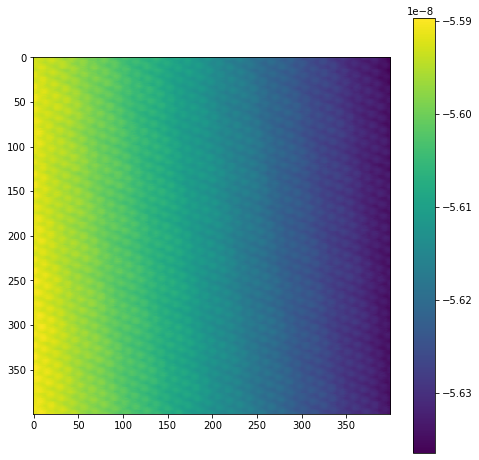

In [7]:
# Plot Topo
plt.figure(figsize=(8,8))
plt.imshow(topo_original,origin='upper')
plt.colorbar()
plt.show()
# background linear signal covered topography

In [4]:
# see how to use subtractMeanPlane
help(STMpy.Topo.subtractMeanPlane)

Help on function subtractMeanPlane in module STMpy.Topo:

subtractMeanPlane(matrix)
    input: 2D nparray of original topography
    output: 2D nparray of topo subtracted backgroud



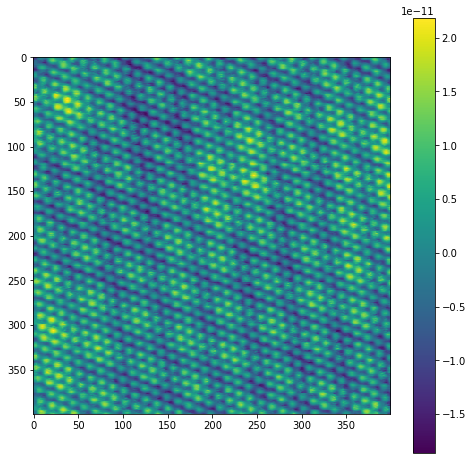

In [8]:
# call function subtractMeanPlane
topo_subtracted = STMpy.Topo.subtractMeanPlane(topo_original)

# plot
plt.figure(figsize=(8,8))
plt.imshow(topo_subtracted,origin='upper')
plt.colorbar()
plt.show()

## Read a dIdV map from 3ds file

In [7]:
import nanonispy as nap
grid_map=nap.read.Grid("/Users/mac/AnacondaProjects/dither/GridSpectroscopy001.3ds")
import STMpy.dIdV

In [8]:
topo=grid_map.signals.get("topo")
lockin=grid_map.signals.get("Lockin X (V)")
bias=grid_map.signals.get("sweep_signal")*1000

In [9]:
help(STMpy.Spectra.getAverageSpec)

Help on function getAverageSpec in module STMpy.Spectra:

getAverageSpec(Spec)
    input:  3d numpy array of spectra
    output: 1d numpy array of mean value for each spectra
    
    returns the average value of spectra over plane at different energy



In [10]:
avSpec = STMpy.Spectra.getAverageSpec(lockin);

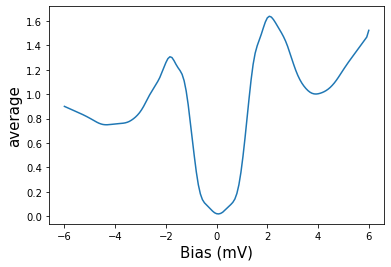

In [11]:
plt.plot(bias,avSpec)
plt.xlabel("Bias (mV)",size=15)
plt.ylabel("average",size=15)
plt.show()

## get linecut on dIdV map

In [12]:
import STMpy.dIdV

In [17]:
help(STMpy.dIdV.getLinecut)

Help on function getLinecut in module STMpy.dIdV:

getLinecut(dIdV, x1, y1, x2, y2, num)
    input: 
        dIdV:  3d numpy array dIdV map
        x1,y1: start point
        x2,y2: stop point
        num:   number of spectra 
    return:
        lincut of 2D numpy array
        
    gives spectra linecut from (x1,y1) to (x2,y2)



In [16]:
# get linecut from (10,110) to (1,70), with 10 spectras
linecut = STMpy.dIdV.getLinecut(lockin,3,110,1,70,15)

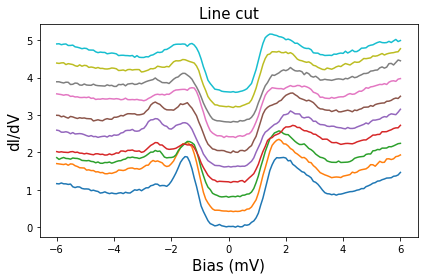

In [14]:
# plot linecut with offset
STMpy.dIdV.plotLinecut(linecut,bias,0.4)

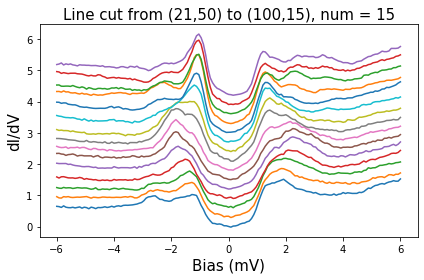

array([[1.52612793, 1.4550482 , 1.45311594, ..., 0.61465502, 0.64013481,
        0.64891636],
       [1.4183228 , 1.3735981 , 1.37681174, ..., 0.61320454, 0.61900747,
        0.65787965],
       [1.46957803, 1.4526664 , 1.44660854, ..., 0.6240949 , 0.63086694,
        0.64980364],
       ...,
       [1.54153013, 1.52552295, 1.4891305 , ..., 0.89487261, 0.93437469,
        0.93236738],
       [1.59905708, 1.56413734, 1.54983711, ..., 1.00493014, 1.05073404,
        1.06236851],
       [1.56479073, 1.51530552, 1.50408006, ..., 1.03912961, 1.00461888,
        0.98816425]])

In [15]:
# or Use one function Linecut
STMpy.dIdV.gridLinecut(grid_map,21,50,100,15,15,0.3)